In [210]:
import matplotlib.pyplot as plt
import numpy as np
from math import erf
from scipy.optimize import curve_fit

In [244]:
# defing functions for integration

# defing the function to integrate
def fs(x):
    return np.exp(-x**2)

# simpson numerical integration
def simpson(f, a, b, n):
    """
    Simpson numerical integration
    Parameters
    ----------
    f : function to integrate
    a : lower limit of integration
    b : upper limit of integration
    n : number of points to use
    """

    h = (b-a)/n #getting the step size
    # creating the array of x values
    x = np.linspace(a, b, n+1)
    #getting functional values
    y = f(x)
    # initializing the sum
    s = y[0]+y[-1]   # sum of first and last values
    for i in range(1, n):
        if i % 2 == 0:
            s += 2*y[i]
        else:
            s += + 4*y[i]
    s = s*h/3 # multiplying by the step size weight
    return h,s

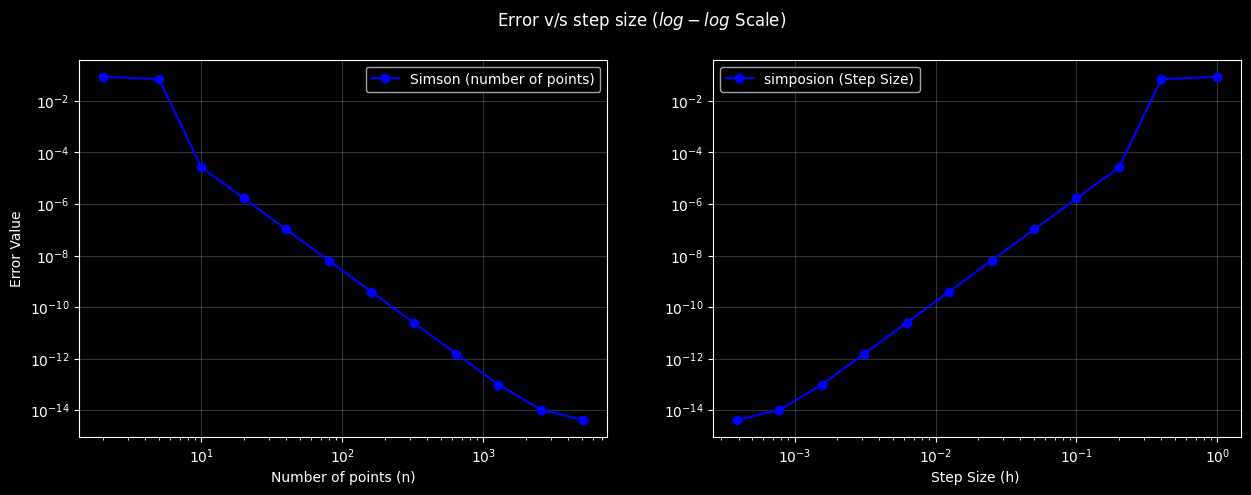

In [246]:
# array of step sizes
n = np.array([2, 5, 10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120])

# array of simson sums and step sizes
s = np.zeros(len(n))
h = np.zeros(len(n))

# exact value of the integral = sqrt(pi)*erf(1)
exact = np.sqrt(np.pi)*erf(1)

# looping over the step sizes
for i in range(len(n)):
    h[i], s[i] = simpson(fs, -1, 1, int(n[i]))

fig, ax = plt.subplots(1,2,figsize=(15,5),dpi=100)
#plotting the error values with log scaling of the x-axis
ax[0].plot(n, np.abs(exact-s), 'o-',c='b', label='Simson (number of points)')
ax[1].plot(h, np.abs(exact-s), 'o-',c='b', label='simposion (Step Size)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_yscale('log')

# formatting the output
ax[0].legend()
ax[1].legend()
ax[0].grid(alpha=0.2)
ax[1].grid(alpha=0.2)
ax[0].set_xlabel('Number of points (n)');
ax[1].set_xlabel('Step Size (h) ');
ax[0].set_ylabel('Error Value');
fig.suptitle('Error v/s step size ($log-log$ Scale)');

## Curve Fitting for the simpson integration

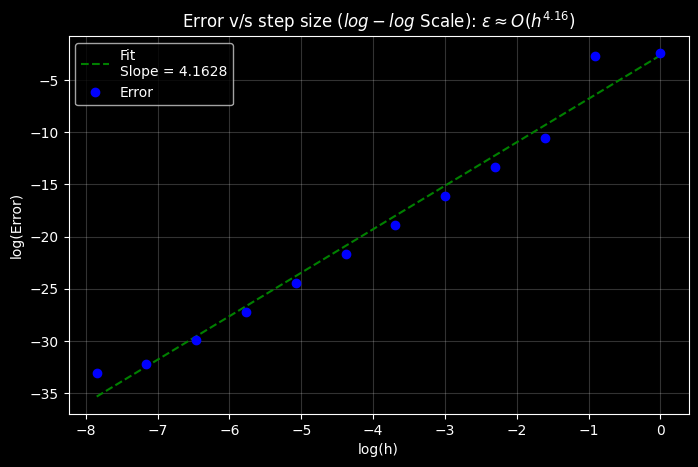

In [243]:
def e_fit(x, a, b):
    return a*x + b

# converting the error and the step size to log 
# error is taken to be the log of absolute value of the error
y_fit = np.log(np.abs((exact-s)))
x_fit = np.log(h)

# doing the fit
popt, pcov = curve_fit(e_fit, x_fit, y_fit)

#plotting the fit
plt.figure(figsize=(8,5),dpi=100)
plt.plot(x_fit, e_fit(x_fit, *popt), 'g--', 
        label='Fit\nSlope = %2.4f' %popt[0])
plt.plot(x_fit, y_fit,'o',c='b', label='Error')
plt.legend()
plt.grid(alpha=0.2)
plt.xlabel('log(h)')
plt.ylabel('log(Error)')
plt.title('Error v/s step size ($log-log$ Scale): $\\epsilon\\approx O(h^{%2.2f})$' %popt[0]);

# Gaussian Quadrature Integration

In [237]:
#defining the function to integrate
def fg(x):
    return (4*x + 4)*np.exp(4*x + 4)

# defining function for gaussian quadrature integration
def gauss(f, n):
    """
    Gaussian quadrature integration
    f: function to integrate
    n: number of points
    """
    # dictionary of weights and abscissas
    abscissas = {
        2: np.array([0.577350269189626, -0.577350269189626]),
        3: np.array([0.774596669241483, 0, -0.774596669241483]),
        4: np.array([0.861136311594053, 0.339981043584856, -0.339981043584856, -0.861136311594053]),
        5: np.array([0.906179845938664, 0.538469310105683, 0, -0.538469310105683, -0.906179845938664]),
    }
    weights = {
        2: np.array([1,1]),
        3: np.array([0.555555555555556, 0.888888888888889, 0.555555555555556]),
        4: np.array([0.347854845137454, 0.652145154862546, 0.652145154862546, 0.347854845137454]),
        5: np.array([0.236926885056189, 0.478628670499366, 0.568888888888889, 0.478628670499366, 0.236926885056189]),
    }
    if n>5 or n<2:
        print('n must be between 2 and 5')
        return
    else:
        #getting required weights
        w = weights[n]
        # getting the function values
        y = f(abscissas[n])
        # initializing the sum
        s = y*w
        return np.sum(s)


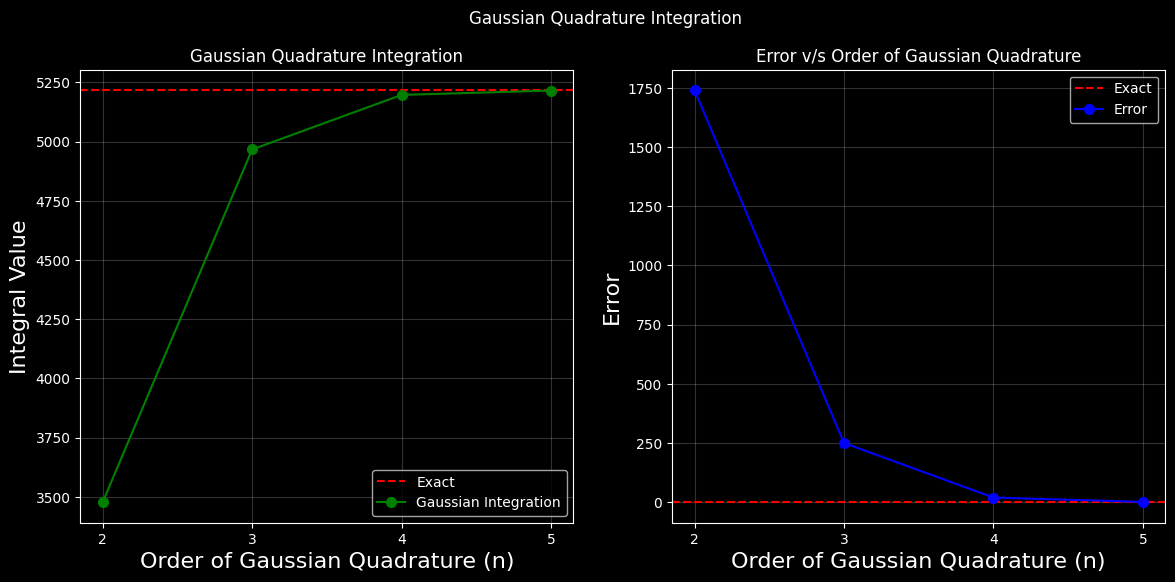

In [239]:
# exact value of the integral to compare with the gaussian quadrature
# I = Integral(te^(2t)) from 0 to 4
exact_gauss = (1/4)*(1 + (7*np.exp(8)))

#array of n values
n = np.array([2, 3, 4, 5])

gauss_integral = np.zeros(len(n))
for i in range(len(n)):
    gauss_integral[i] = gauss(fg, n[i])

#plotting the resulsts
fig, ax = plt.subplots(1,2,figsize=(14,6),dpi=100)
ax[0].axhline(y=exact_gauss, color='r',ls='--', label='Exact')
ax[0].plot(n, gauss_integral, 'o-', c='g',ms=7, label='Gaussian Integration')
ax[1].axhline(y=0, color='r',ls='--', label='Exact')
ax[1].plot(n, exact_gauss-gauss_integral, 'o-',c='b', ms=7, label='Error')

#formatting the output
ax[0].legend()
ax[1].legend()
ax[0].grid(alpha=0.2)
ax[1].grid(alpha=0.2)
ax[0].set_xticks(n)
ax[1].set_xticks(n)
ax[0].set_xlabel('Order of Gaussian Quadrature (n)', fontsize=16);
ax[1].set_xlabel('Order of Gaussian Quadrature (n)', fontsize=16);
ax[0].set_ylabel('Integral Value', fontsize=16);
ax[1].set_ylabel('Error', fontsize=16);
ax[0].set_title('Gaussian Quadrature Integration');
ax[1].set_title('Error v/s Order of Gaussian Quadrature');
fig.suptitle('Gaussian Quadrature Integration')
plt.savefig('Gaussian_Quadrature_Integration.jpg', bbox_inches='tight',dpi=200)